#### Digits MNIST - Ai notebook
// Code by Om

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset

(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

print(f"Training data shape: {training_images.shape}")

Training data shape: (60000, 28, 28)


Label for the image: 4


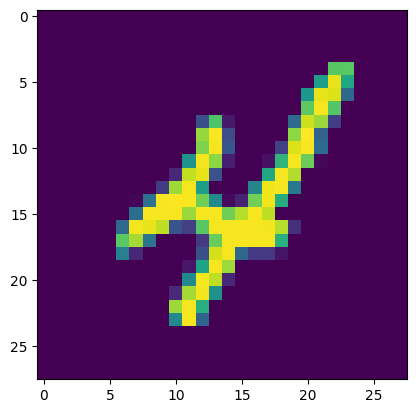

In [3]:
plt.imshow(training_images[9])
print(f"Label for the image: {training_labels[9]}")

In [4]:
# Normalize the data
training_images = training_images/255.0

##### Create and compile the model

In [5]:
# Create the Sequential model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax)
])

print(model.summary())

2025-06-13 14:50:19.175375: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-06-13 14:50:19.175404: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-06-13 14:50:19.175411: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1749806419.175425 10576299 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749806419.175447 10576299 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

##### Earlystopping callback

In [7]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
#     Callback should run on epoch end
    def on_epoch_end(self, epoch, logs=None):
#         Stop when accuracy is more than or equal to 98%
        if logs['accuracy'] >= 0.91:
            self.model.stop_training = True
            print("\nReached 91% accuracy .... so stopping training")

##### Training the model

In [8]:
# Training the model
model.fit(x=training_images, y=training_labels, epochs=10, callbacks=[EarlyStoppingCallback()])

Epoch 1/10


2025-06-13 14:50:19.711893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8570 - loss: 0.4915
Epoch 2/10
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9153 - loss: 0.3029
Reached 91% accuracy .... so stopping training
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9153 - loss: 0.3029
